In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [37]:
# load the dataset
df= pd.read_csv("data/Cardekho.csv")
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


In [38]:
null_counts = df.isnull().sum()
total_rows = len(df)

percentage_null = (null_counts / total_rows) * 100

# print(f" {percentage_null} and total number {null_counts}")

d = {
    'Percentage': percentage_null,
    'Null values': null_counts
}

df1 = pd.DataFrame(d)
df1

,Percentage,Null values
name,0.000000,0
year,0.000000,0
selling_price,0.000000,0
km_driven,0.000000,0
fuel,0.000000,0
seller_type,0.000000,0
transmission,0.000000,0
owner,0.000000,0
mileage(km/ltr/kg),2.718996,221
engine,2.718996,221


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7913 non-null   object 
 11  seats               7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB


In [40]:
# df["mileage(km/ltr/kg)"].mean()

In [41]:
df.drop_duplicates(inplace=True)

In [42]:
current_year = datetime.now().year


df["Cars_Age"] = current_year - df["year"]

In [43]:
df["Cars_Age"].head()

0    11
1    11
2    19
3    15
4    18
Name: Cars_Age, dtype: int64

In [44]:
df["fuel"].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [45]:
df["transmission"].unique()

array(['Manual', 'Automatic'], dtype=object)

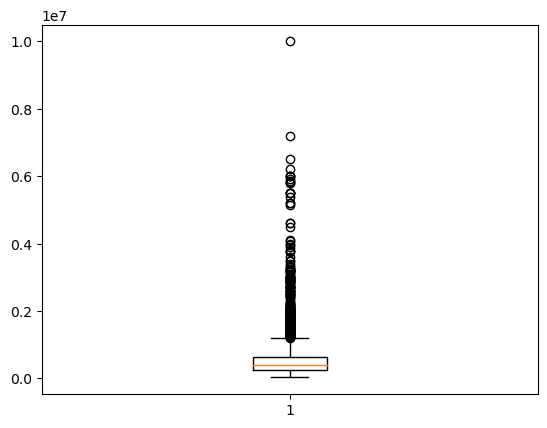

In [46]:
plt.boxplot(df['selling_price'])

plt.show()

In [47]:
df['selling_price'].sort_values(ascending=False).head(10)

170     10000000
2938     7200000
4952     6523000
4950     6223000
136      6000000
4766     6000000
1071     6000000
4951     5923000
148      5850000
6258     5830000
Name: selling_price, dtype: int64

In [48]:
df['selling_price'].sort_values(ascending=False).tail(10)

4366    35000
1252    35000
6348    35000
3919    33983
4811    33351
1926    31504
5965    31000
2145    30000
6776    30000
5714    29999
Name: selling_price, dtype: int64

In [49]:
# check values more than 5000000
df.loc[df['selling_price']> 5000000].value_counts().sum()

20

In [50]:
# check values less than 10000
df.loc[df['selling_price']< 10000].value_counts().sum()

0

In [51]:
# drop outliers 10000 < ['selling_price'] > 50000000
df.drop(df[(df['selling_price'] < 10000) | (df['selling_price'] > 5000000)].index, inplace=True)
    

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6906 entries, 0 to 8125
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                6906 non-null   object 
 1   year                6906 non-null   int64  
 2   selling_price       6906 non-null   int64  
 3   km_driven           6906 non-null   int64  
 4   fuel                6906 non-null   object 
 5   seller_type         6906 non-null   object 
 6   transmission        6906 non-null   object 
 7   owner               6906 non-null   object 
 8   mileage(km/ltr/kg)  6698 non-null   float64
 9   engine              6698 non-null   float64
 10  max_power           6701 non-null   object 
 11  seats               6698 non-null   float64
 12  Cars_Age            6906 non-null   int64  
dtypes: float64(3), int64(4), object(6)
memory usage: 755.3+ KB


In [54]:
# Replace string "nan" and empty strings with actual NaN
df['max_power'] = df['max_power'].replace(["nan", " "], np.nan)

In [55]:
# fill columns with missing values using median
df["mileage(km/ltr/kg)"].fillna(df["mileage(km/ltr/kg)"].median(), inplace=True)
df["engine"].fillna(df["engine"].median(), inplace=True)
df["max_power"].fillna(df["max_power"].median(), inplace=True)
df["seats"].fillna(df["seats"].median(), inplace=True)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6906 entries, 0 to 8125
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                6906 non-null   object 
 1   year                6906 non-null   int64  
 2   selling_price       6906 non-null   int64  
 3   km_driven           6906 non-null   int64  
 4   fuel                6906 non-null   object 
 5   seller_type         6906 non-null   object 
 6   transmission        6906 non-null   object 
 7   owner               6906 non-null   object 
 8   mileage(km/ltr/kg)  6906 non-null   float64
 9   engine              6906 non-null   float64
 10  max_power           6906 non-null   object 
 11  seats               6906 non-null   float64
 12  Cars_Age            6906 non-null   int64  
dtypes: float64(3), int64(4), object(6)
memory usage: 755.3+ KB


In [57]:
# change data type for df['max_power'] to float
df['max_power'].astype(float)

0        74.00
1       103.52
2        78.00
3        90.00
4        88.20
         ...  
8121     67.10
8122     88.73
8123     82.85
8124    110.00
8125     73.90
Name: max_power, Length: 6906, dtype: float64

In [58]:
df["price_per_kilometer"] = df["selling_price"] / df["mileage(km/ltr/kg)"]

df["price_per_kilometer"].head()

0    19230.769231
1    17502.365184
2     8926.553672
3     9782.608696
4     8074.534161
Name: price_per_kilometer, dtype: float64

In [60]:
df.to_csv("car_clean.csv", index=False)